In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("pdb.csv")

In [ ]:
data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (141401, 14)


In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data=data[0:500]

In [ ]:
n = (pd.unique(data['macromoleculeType']))
print(n)

['DNA/RNA Hybrid' 'DNA' 'Protein' 'Protein#DNA' 0 'DNA#RNA' 'RNA'
 'DNA#DNA/RNA Hybrid' 'Protein#RNA']


In [ ]:
j=1
for i in n:
  data['macromoleculeType'].replace(i,j,inplace=True)
  j+=1



In [ ]:
data.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,1,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",0.0,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,2,24,2.25,7939.35,0,0.0,2.00,38.45,0,0.0,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,3,154,2.07,18112.80,0,0.0,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,2,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,3,165,1.74,18926.61,0,0.0,2.75,55.28,0,0.0,1993.0


In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (500, 14)


In [ ]:
x = data.loc[:, ['macromoleculeType','residueCount',
                 'structureMolecularWeight','phValue']].values

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2) 
nbrs=neighb.fit(x)
distances,indices=nbrs.kneighbors(x) 

In [ ]:
print(distances)

[[0.00000000e+00 3.06468987e+01]
 [0.00000000e+00 4.33849052e+00]
 [0.00000000e+00 5.97000000e+00]
 [0.00000000e+00 1.99765888e+01]
 [0.00000000e+00 1.38621788e+00]
 [0.00000000e+00 2.00149969e+01]
 [0.00000000e+00 4.81603831e+01]
 [0.00000000e+00 1.06012456e+02]
 [0.00000000e+00 1.90200000e+01]
 [0.00000000e+00 1.00503731e+01]
 [0.00000000e+00 2.45154156e+01]
 [0.00000000e+00 2.00000000e+00]
 [0.00000000e+00 1.13470525e+02]
 [0.00000000e+00 2.00000000e+00]
 [0.00000000e+00 2.58152687e+01]
 [0.00000000e+00 9.35265203e+00]
 [0.00000000e+00 1.64012195e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e+00]
 [0.00000000e+00 6.72383819e+01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e+00]
 [0.00000000e+00 7.07548585e+00]
 [0.00000000e+00 4.68000000e+00]
 [0.00000000e+00 1.30200000e+01]
 [0.00000000e+00 1.73873927e+02]
 [0.00000000e+00 8.31875495e+01]
 [0.00000000e+00 9.95037688e-01]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.97000000e+00]
 [0.000000

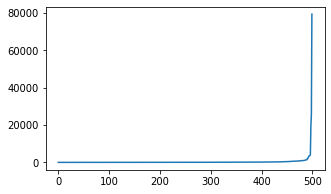

In [ ]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3)
plt.plot(distances) 
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 10000, min_samples = 5).fit(x) 
labels = dbscan.labels_ 

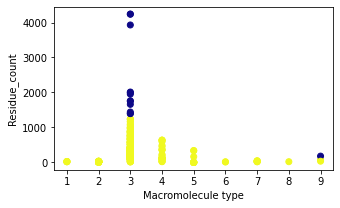

In [ ]:
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma")
plt.xlabel("Macromolecule type") 
plt.ylabel("Residue_count") 
plt.show() 

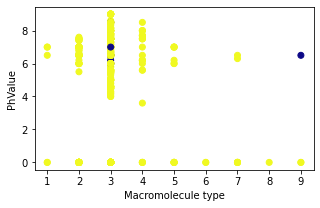

In [ ]:
plt.scatter(x[:,0], x[:,3], c = labels, cmap= "plasma")
plt.xlabel("Macromolecule type") 
plt.ylabel("PhValue") 
plt.show()

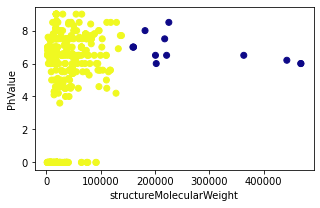

In [ ]:
plt.scatter(x[:,2], x[:,3], c = labels, cmap= "plasma")
plt.xlabel("structureMolecularWeight") 
plt.ylabel("PhValue") 
plt.show()